# The Sparks Foundation - GRIP - Data Science and Business Analytics

# Author: Sohail Ahmed

# April 2022


# TASK 3: Perform 'Exploratory Data Analysis' on dataset 'Sample Superstore'

# <span style="color: blue; font-size:18px">Importing essential librariers</span>

In [1]:
import numpy as np #For numerical operations
import pandas as pd #For handling the dataset
import matplotlib.pyplot as plt #For visualization
import seaborn as sns
import os
%matplotlib inline

# <span style="color: blue; font-size:18px">Importing the dataset</span>

In [2]:
data = pd.read_csv("SampleSuperstore.csv")

# <span style="color: blue; font-size:18px">Exploring the dataset</span>

In [3]:
# Viewing the top 5 rows of the dataset
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
# Counting the number of rows and columns
data.shape

(9994, 13)

In [5]:
# Information about Columns, Count, Data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
# Checking for duplicated values
data.duplicated().sum()            

17

In [7]:
# Dropping duplicated values
data.drop_duplicates(inplace=True)

In [8]:
# Confirmation of the drop action
data.duplicated().sum()             

0

In [9]:
# Checking for null values
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [10]:
# Checking for unique values in each column
data.nunique() 

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [11]:
# Statistical insights
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


# <span style="color: blue; font-size:18px">Data Visualization and insights</span>

<AxesSubplot:>

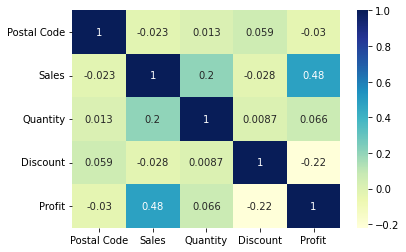

In [12]:
# Correlation heatmap
import seaborn as sns
sns.heatmap(data.corr(),annot=True, cmap="YlGnBu")

In [13]:
data['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

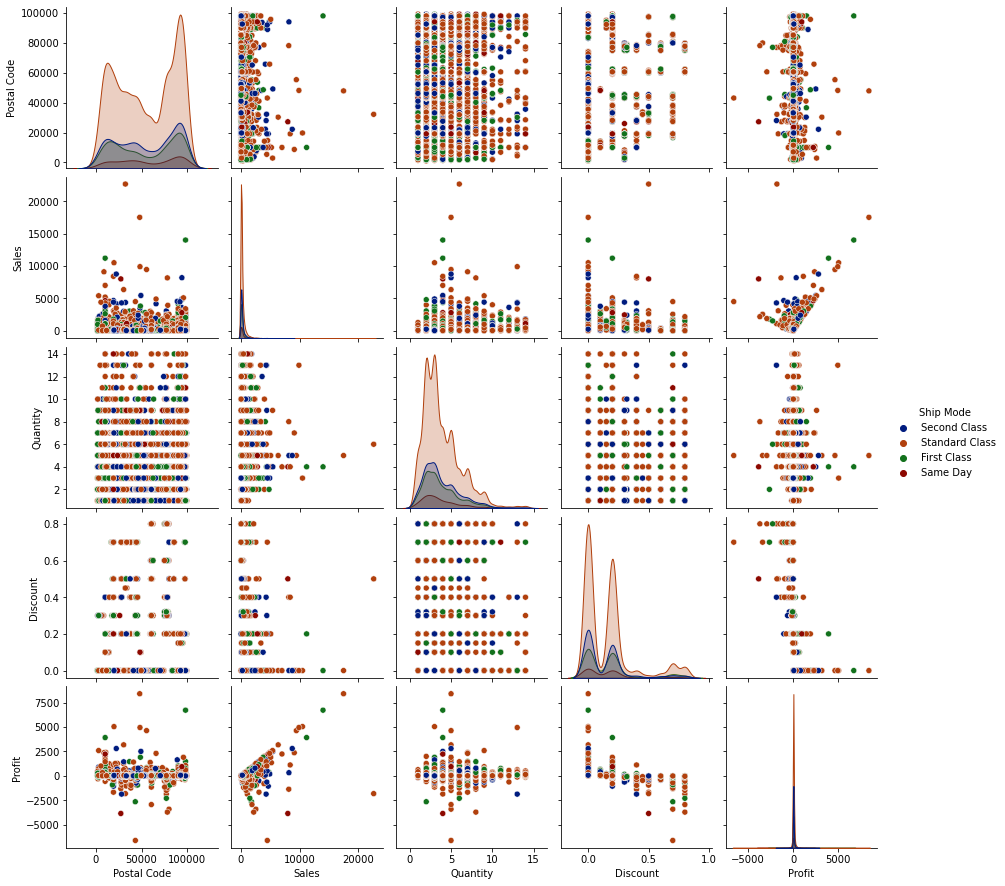

In [14]:
sns.pairplot(data, hue='Ship Mode', palette="dark")

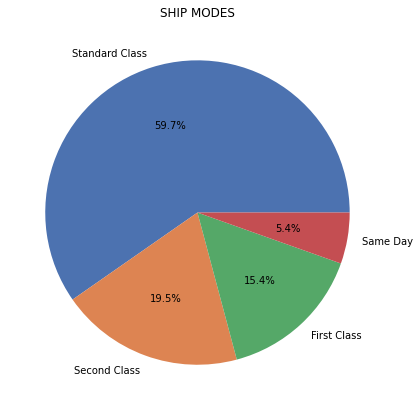

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

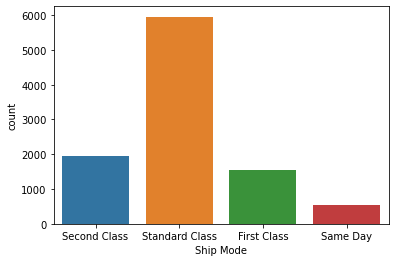

In [15]:
plt.figure(figsize=(7,7))
plt.title('SHIP MODES')
plt.pie(data['Ship Mode'].value_counts(), labels=data['Ship Mode'].value_counts().index, autopct= '%1.1f%%',
        colors = sns.color_palette('deep'))
plt.show()
sns.countplot(x=data['Ship Mode'])

# <span style="color: black; font-size:15px">In ship mode, Standard Class is the most preferred option</span>

In [16]:
data['Segment'].value_counts()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

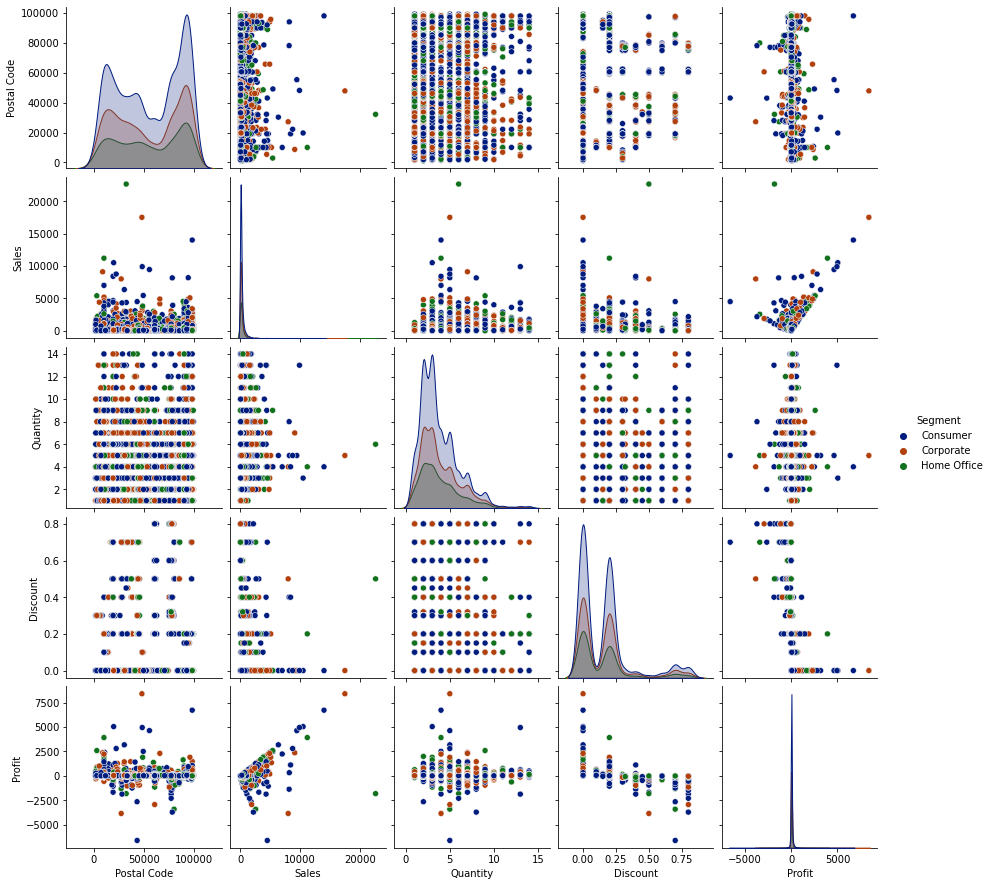

In [17]:
sns.pairplot(data,hue='Segment', palette="dark")

<AxesSubplot:xlabel='Segment', ylabel='count'>

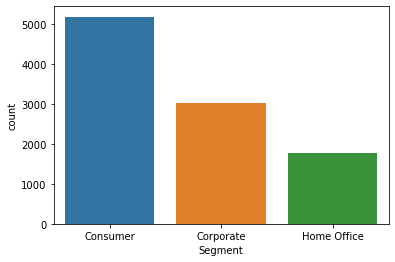

In [18]:
sns.countplot(x=data['Segment'])

# <span style="color: black; font-size:15px">Number of consumers are higher as compared to Corporate Segment and Home Office segment.</span>

In [19]:
data['Category'].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

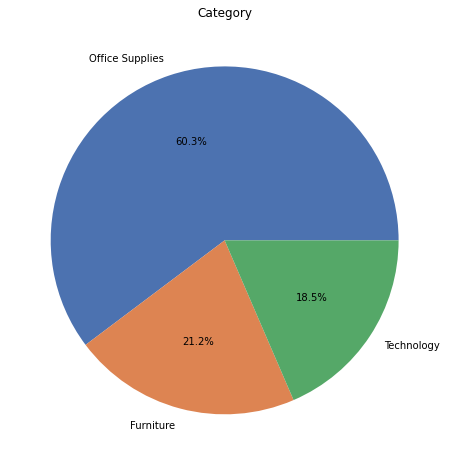

<AxesSubplot:xlabel='Category', ylabel='count'>

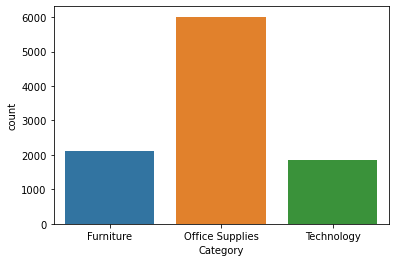

In [20]:
plt.figure(figsize=(8,8))
plt.title('Category')
plt.pie(data['Category'].value_counts(),labels=data['Category'].value_counts().index,autopct='%1.1f%%',
        colors = sns.color_palette('deep'))
plt.show()
sns.countplot(x='Category',data=data)

# <span style="color: black; font-size:15px">Office supplies category is highest as compared to Furniture and Technology</span>

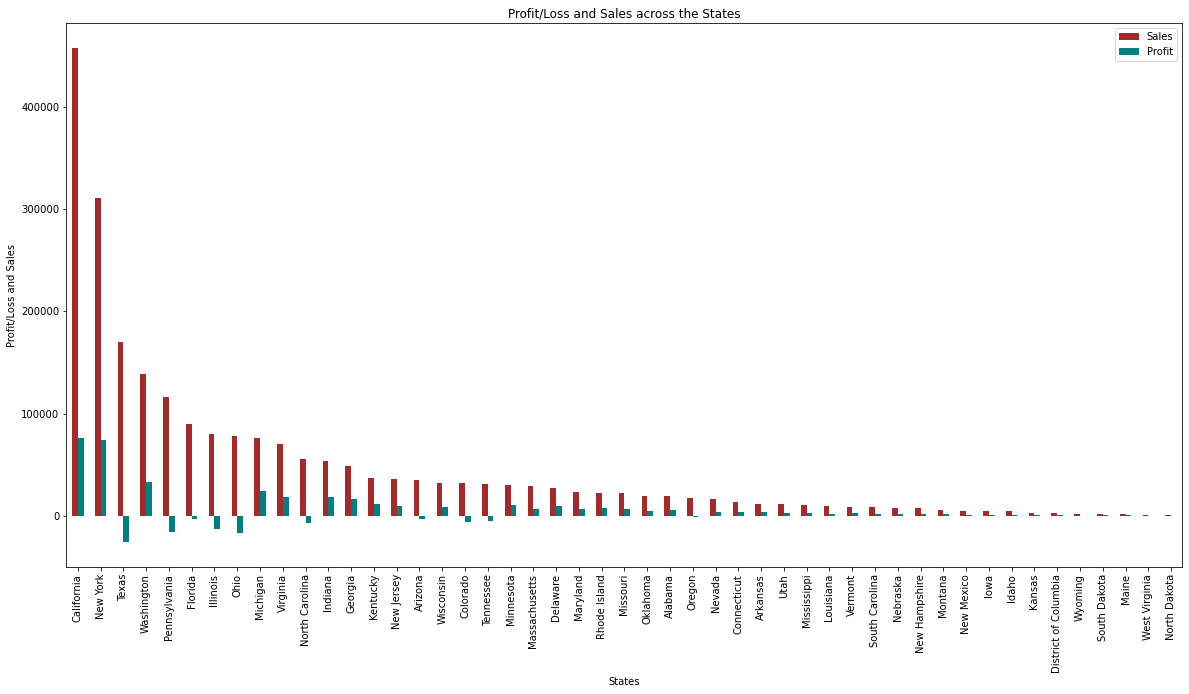

In [21]:
# Statewise profit and sells
pls=data.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
pls[:].plot.bar(color=['brown','teal'],figsize=(20,10))
plt.title('Profit/Loss and Sales across the States')
plt.xlabel('States')
plt.ylabel('Profit/Loss and Sales')
plt.show()

# <span style="color: black; font-size:15px">Insights from the grpah convey that California and New York have the highest profits while Texas and Ohio have the least profits.</span>

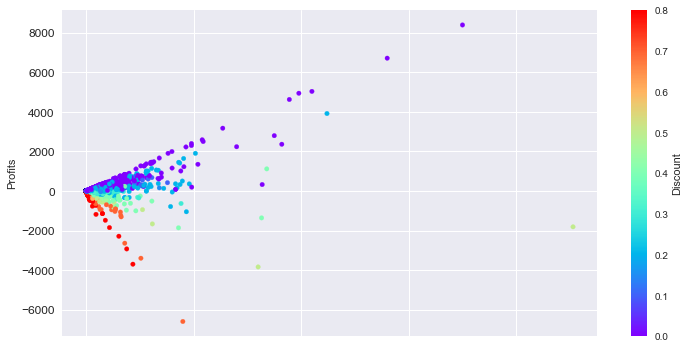

In [22]:
# Profit vs Discount
plt.style.use('seaborn')
data.plot(kind="scatter",figsize=(12,6),x="Sales",y="Profit",c="Discount",s=20,fontsize=12,colormap='rainbow')
plt.ylabel('Profits')
plt.xlabel('Sales')
plt.show()

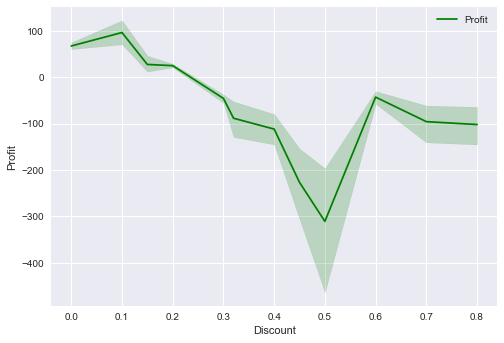

In [23]:
sns.lineplot(x='Discount',y='Profit',label='Profit',color='green', data=data)
plt.legend()
plt.show()

# <span style="color: black; font-size:15px">From graph it can be inferred that for discount between 0 to 0.5, discount is negatively related to profits whereas for discounts between 0.5 and 0.6 it has positive relation. </span>

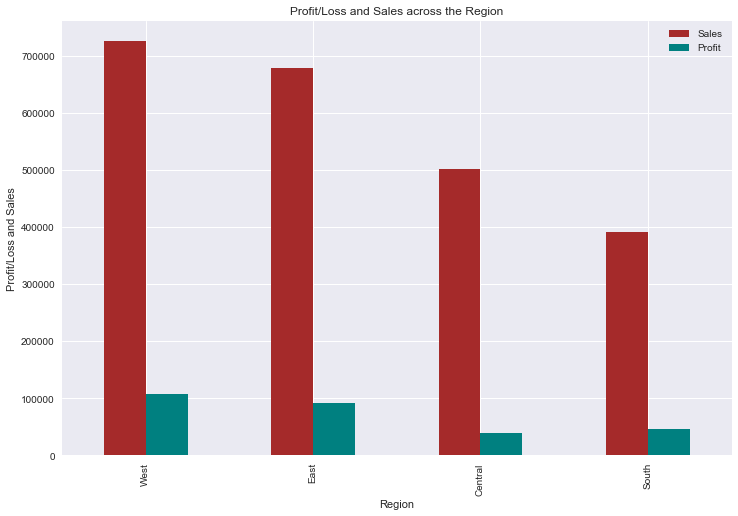

In [24]:
# Regionwise profit and sells
pls=data.groupby('Region')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
pls[:].plot.bar(color=['brown','teal'],figsize=(12,8))
plt.title('Profit/Loss and Sales across the Region')
plt.xlabel('Region')
plt.ylabel('Profit/Loss and Sales')
plt.show()


# <span style="color: black; font-size:15px">From graph it can be inferred that West region has highest sells and profits and South region has the least</span>

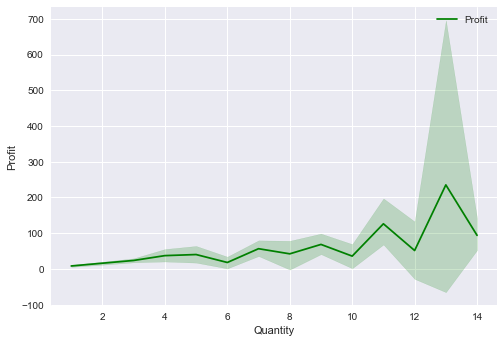

In [25]:
# Profit vs Quantity
sns.lineplot(x='Quantity',y='Profit',label='Profit',color='green',data=data)
plt.legend()
plt.show()

# <span style="color: black; font-size:15px">From graph it can be inferred that as quantity increases, profit also increases.</span>

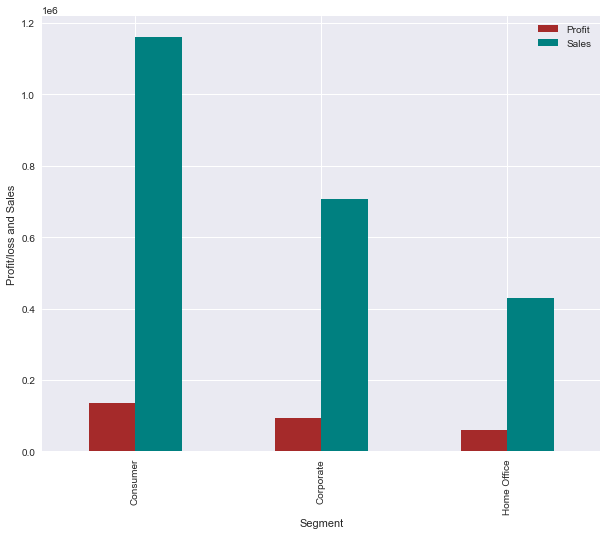

In [26]:
# Profit and sells across different segments
data.groupby('Segment')[['Profit','Sales']].sum().plot.bar(color=['brown','teal'],figsize=(10,8))
plt.ylabel('Profit/loss and Sales')
plt.show()

# <span style="color: black; font-size:15px">From graph it can be inferred that Consumer segment has the highest profit and sales </span>

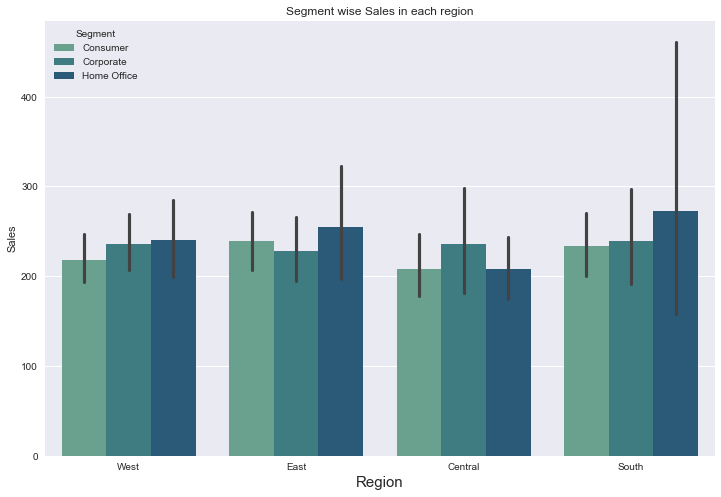

In [27]:
# Segment wise sales in each region
plt.figure(figsize=(12,8))
plt.title('Segment wise Sales in each region')
sns.barplot(x='Region',y='Sales',data=data,hue='Segment',order=data['Region'].value_counts().index,palette='crest')
plt.xlabel('Region',fontsize=15)
plt.show()

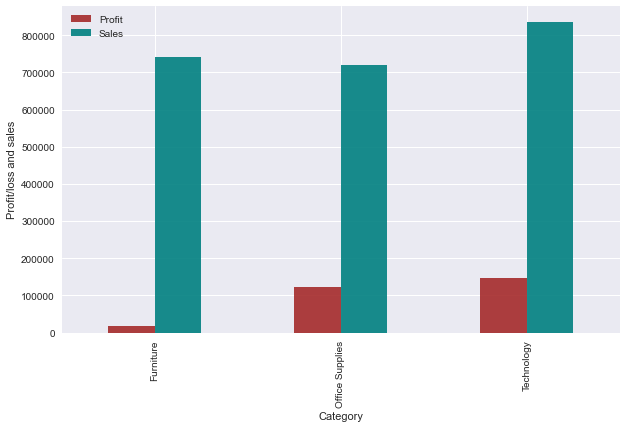

In [28]:
# Category wise profit and sells
data.groupby('Category')[['Profit','Sales']].sum().plot.bar(color=['brown','teal'],alpha=0.9,figsize=(10,6))
plt.ylabel('Profit/loss and sales')
plt.show()

# <span style="color: black; font-size:15px">From graph it can be inferred that  Technology has highest profit and sells </span>

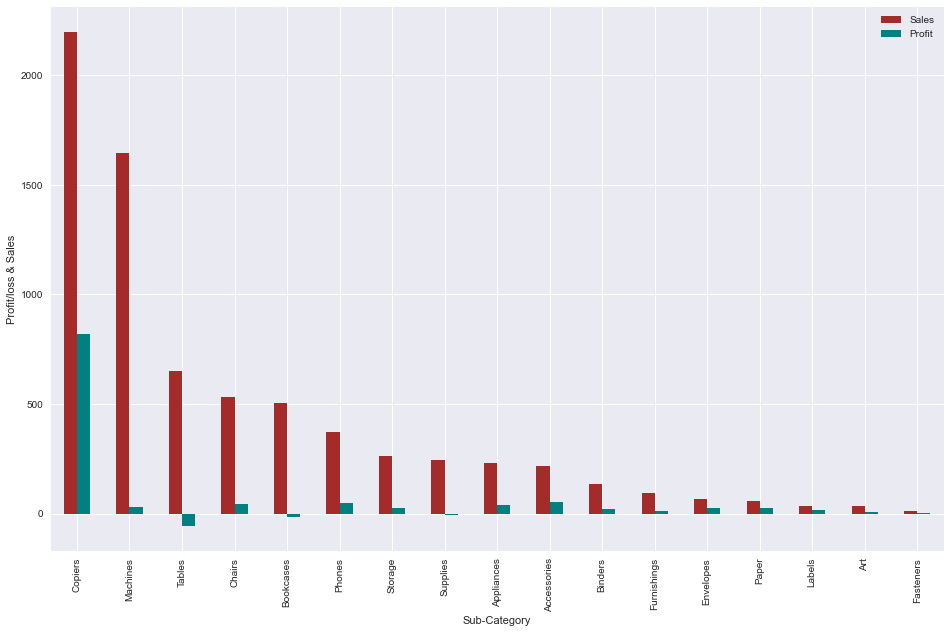

In [29]:
# Subcategory wise profit and sales
ps=data.groupby('Sub-Category')[['Sales','Profit']].mean().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['brown','teal'],figsize=(16,10))
plt.xlabel('Sub-Category')
plt.ylabel('Profit/loss & Sales')
plt.show()

# <span style="color: black; font-size:15px">From graph it can be inferred that Copier has highest sale and profit whereas Tables have least profit and Fasteners have least sales.</span> 